In [3]:
import sys
import numpy as np
# import basemap
# from mpl_toolkits.basemap import Basemap
# import FESOM packages
sys.path.append("./modules/")
from load_mesh_data import *
import seawater as sw
from fesom_plot_tools import *
import cmocean.cm as cmo
from netCDF4 import Dataset

%matplotlib inline
import matplotlib.pylab as plt
from matplotlib import cm



from regriding import *
from numba import jit
from netCDF4 import Dataset

/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [4]:
# rm /work/ollie/nkolduno/meshes/CORE2_fesom2/joblib_mesh_fesom2

In [5]:
meshpath  ='/work/ollie/nkolduno/meshes/CORE2_fesom2//'
# alpha, beta, gamma=[0, 0, -0]
mesh=load_mesh(meshpath,  usepickle = False, usejoblib=True)
elem2=mesh.elem[mesh.no_cyclic_elem,:]
voltri = mesh.voltri[mesh.no_cyclic_elem]

The usejoblib == True)
The joblib file for FESOM2 exists.
The mesh will be loaded from /work/ollie/nkolduno/meshes/CORE2_fesom2/joblib_mesh_fesom2


In [6]:
fl = Dataset('/work/ollie/nkolduno/MESH_CHECK/core2_io/fesom.mesh.diag.nc')
fl.variables.keys()

odict_keys(['zbar', 'Z', 'elem_area', 'nlevels_nod2D', 'nlevels', 'nod_in_elem2D_num', 'nod_part', 'elem_part', 'nod_area', 'elem', 'nodes', 'nod_in_elem2D', 'edges', 'edge_tri', 'edge_cross_dxdy', 'gradient_sca_x', 'gradient_sca_y'])

## Model topography on elements

In [7]:
m = Basemap(projection='robin',lon_0=0, boundinglat=-30, resolution='l')
x, y = m(mesh.x2, mesh.y2)
# glon, glat = -105.890268802850   ,    -49.7468002202794
# lli = np.where((mesh.x2.astype('float32') == glon)&(mesh.y2.astype('float32') == glat))
# xb, yb = m(mesh.x2[lli], mesh.y2[lli])

cur the region, good for large meshes

In [9]:
nlevels = fl.variables['nlevels'][:]
elem_no_nan, no_nan_triangles = cut_region(mesh, nlevels, box=[-170, 170, -80, 80], depth=0)

In [10]:
elvls = pd.read_csv('/work/ollie/nkolduno/meshes/CORE2_fesom2/elvls.out', names=['elvls'])

/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


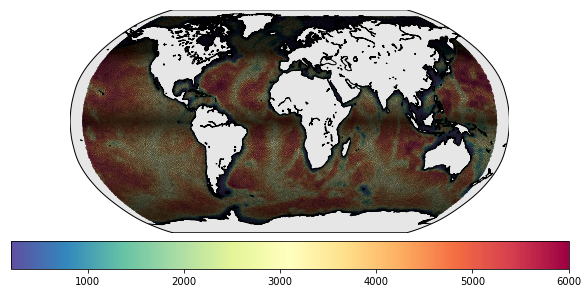

In [13]:
plt.figure(figsize=(10,5))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
mm = plt.tripcolor(x, y, elem_no_nan, -mesh.zlev[elvls.values[:,0]-1][no_nan_triangles],
                   #facecolors=topo[mesh.no_cyclic_elem], \
              edgecolors='k',\
             cmap=cm.Spectral_r, 
             vmin = 200, vmax = 6000)
# plt.scatter(x1, y1, 100)
# plt.scatter(xb, yb, 300, marker='x', color='r')
plt.colorbar(mm, orientation='horizontal', pad=0.03);

## Model topography on nodes

In [14]:
nod_topo = fl.variables['nlevels_nod2D'][:]
nod_topo = mesh.zlev[nod_topo-1]

/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  s)


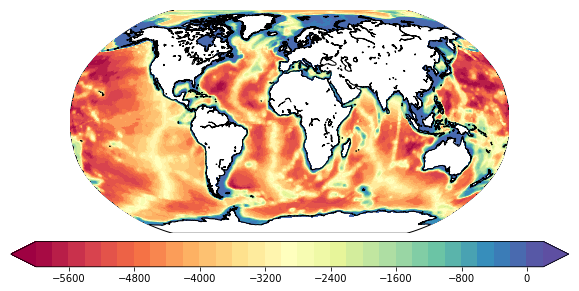

In [15]:
vmin = -6000
vmax = 200
steps = 32
plt.figure(figsize=(10,5))
m.drawmapboundary()
m.drawcoastlines()
mm = plt.tricontourf(x, y, elem2, nod_topo, \
              #facecolors=topo[mesh.no_cyclic_elem], \
              edgecolors='k',\
             cmap=cm.Spectral, 
             levels= np.linspace(vmin, vmax, steps).astype('int'), 
#                levels = mesh.zlev[20:]*-1,
                     extend='both')
# plt.scatter(xb, yb, 300, marker='x', color='r')
plt.colorbar(mm, orientation='horizontal', pad=0.03);

## Element areas

In [16]:
elem_area = fl.variables['elem_area'][:]
elem_area = np.sqrt(elem_area*2)/1e3

In [17]:
nlevels = fl.variables['nlevels'][:]
elem_no_nan, no_nan_triangles = cut_region(mesh, nlevels, box=[-170, 170, -80, 80], depth=0)

In [18]:
m = Basemap(projection='robin',lon_0=0, boundinglat=-30, resolution='l')
x, y = m(mesh.x2, mesh.y2)
# glon, glat = -105.890268802850   ,    -49.7468002202794
# lli = np.where((mesh.x2.astype('float32') == glon)&(mesh.y2.astype('float32') == glat))
# xb, yb = m(mesh.x2[lli], mesh.y2[lli])

/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


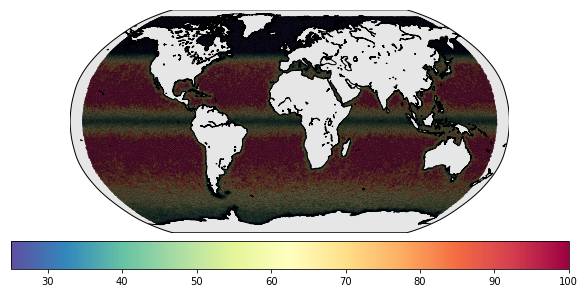

In [19]:
plt.figure(figsize=(10,5))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
mm = plt.tripcolor(x, y, elem_no_nan, elem_area[no_nan_triangles],
                   #facecolors=topo[mesh.no_cyclic_elem], \
              edgecolors='k',\
             cmap=cm.Spectral_r, 
             vmin = 25, vmax = 100)
# plt.scatter(x1, y1, 100)
# plt.scatter(xb, yb, 300, marker='x', color='r')
plt.colorbar(mm, orientation='horizontal', pad=0.03);

## Nod Areas

In [20]:
nod_area = fl.variables['nod_area'][0,:]
nod_area = (np.sqrt(nod_area/np.pi)/1e3)*2

In [21]:
m = Basemap(projection='robin',lon_0=0, boundinglat=-30, resolution='l')
x, y = m(mesh.x2, mesh.y2)
# glon, glat = -105.890268802850   ,    -49.7468002202794
# lli = np.where((mesh.x2.astype('float32') == glon)&(mesh.y2.astype('float32') == glat))
# xb, yb = m(mesh.x2[lli], mesh.y2[lli])

/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  s)


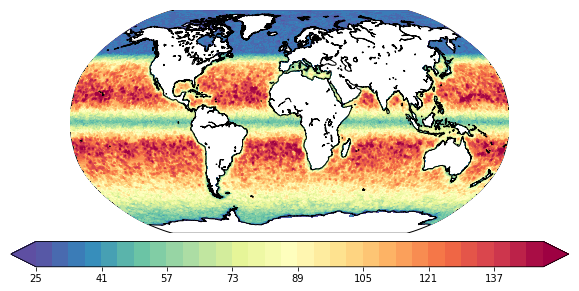

In [22]:
vmin = 25
vmax = 150
steps = 32
plt.figure(figsize=(10,5))
m.drawmapboundary()
m.drawcoastlines()
mm = plt.tricontourf(x, y, elem2, nod_area, \
              #facecolors=topo[mesh.no_cyclic_elem], \
              edgecolors='k',\
             cmap=cm.Spectral_r, 
             levels= np.linspace(vmin, vmax, steps).astype('int'), 
#                levels = mesh.zlev[20:]*-1,
                     extend='both')
# plt.scatter(xb, yb, 300, marker='x', color='r')
plt.colorbar(mm, orientation='horizontal', pad=0.03);

## Mesh partitioning

In [23]:
elem_part = fl.variables['elem_part']
nod_part = fl.variables['nod_part']

In [24]:
nlevels = fl.variables['nlevels'][:]
elem_no_nan, no_nan_triangles = cut_region(mesh, nlevels, box=[-170, 170, -80, 80], depth=0)

In [25]:
m = Basemap(projection='robin',lon_0=0, boundinglat=-30, resolution='l')
x, y = m(mesh.x2, mesh.y2)
# glon, glat = -105.890268802850   ,    -49.7468002202794
# lli = np.where((mesh.x2.astype('float32') == glon)&(mesh.y2.astype('float32') == glat))
# xb, yb = m(mesh.x2[lli], mesh.y2[lli])

### On elements (slow)

/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


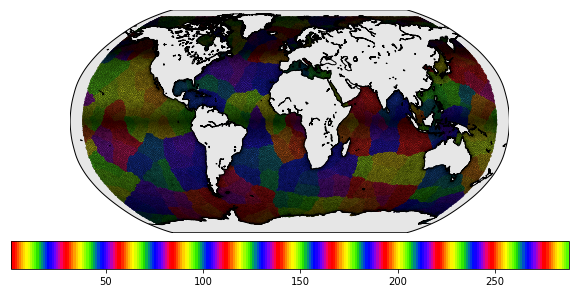

In [26]:
plt.figure(figsize=(10,5))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
mm = plt.tripcolor(x, y, elem_no_nan, elem_part[no_nan_triangles],
                   #facecolors=topo[mesh.no_cyclic_elem], \
              edgecolors='k',\
             cmap=cm.prism, 
             vmin = 1, vmax = 288)
# plt.scatter(x1, y1, 100)
# plt.scatter(xb, yb, 300, marker='x', color='r')
plt.colorbar(mm, orientation='horizontal', pad=0.03);

### Contour map (fast)

/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/home/ollie/nkolduno/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'edgecolors'
  s)


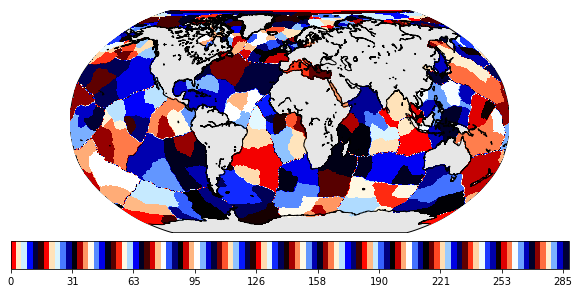

In [27]:
plt.figure(figsize=(10,5))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()
mm = plt.tricontourf(x, y, elem2, nod_part,
                   #facecolors=topo[mesh.no_cyclic_elem], \
              edgecolors='k',\
             cmap=cm.flag,
                     levels=np.linspace(0,288,101).astype('int'),
#              vmin = 1, vmax = 288
                    )
# plt.scatter(x1, y1, 100)
# plt.scatter(xb, yb, 300, marker='x', color='r')
plt.colorbar(mm, orientation='horizontal', pad=0.03);